<a href="https://colab.research.google.com/github/RuelSammy/LinearRegressionModel/blob/main/House_Price_Predication_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1- Import all Necessary Libraries

Mounting Google Drive

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2. Importing the data


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/USA House Price Prediction Project/USA_Housing.csv')

3. Data Overview

In [ ]:
df.head(10)

NameError: ignored

In [ ]:
df = df.drop(['Address'],axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [ ]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

Exploratory Data Analysis

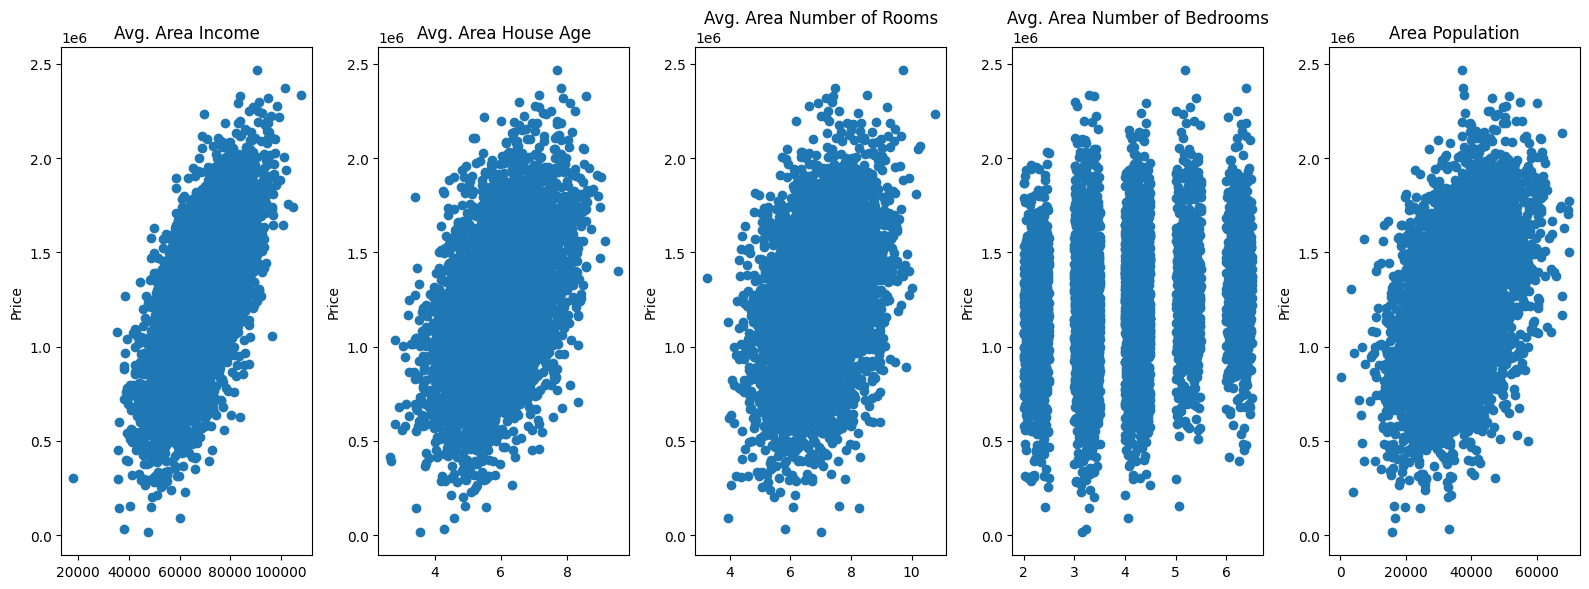

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(16,6))

axes[0].plot(df['Avg. Area Income'],df['Price'],'o')
axes[0].set_ylabel("Price")
axes[0].set_title("Avg. Area Income")

axes[1].plot(df['Avg. Area House Age'],df['Price'],'o')
axes[1].set_title("Avg. Area House Age")
axes[1].set_ylabel("Price")

axes[2].plot(df['Avg. Area Number of Rooms'],df['Price'],'o')
axes[2].set_title("Avg. Area Number of Rooms");
axes[2].set_ylabel("Price")

axes[3].plot(df['Avg. Area Number of Bedrooms'],df['Price'],'o')
axes[3].set_title("Avg. Area Number of Bedrooms");
axes[3].set_ylabel("Price")

axes[4].plot(df['Area Population'],df['Price'],'o')
axes[4].set_title("Area Population");
axes[4].set_ylabel("Price")
plt.tight_layout();

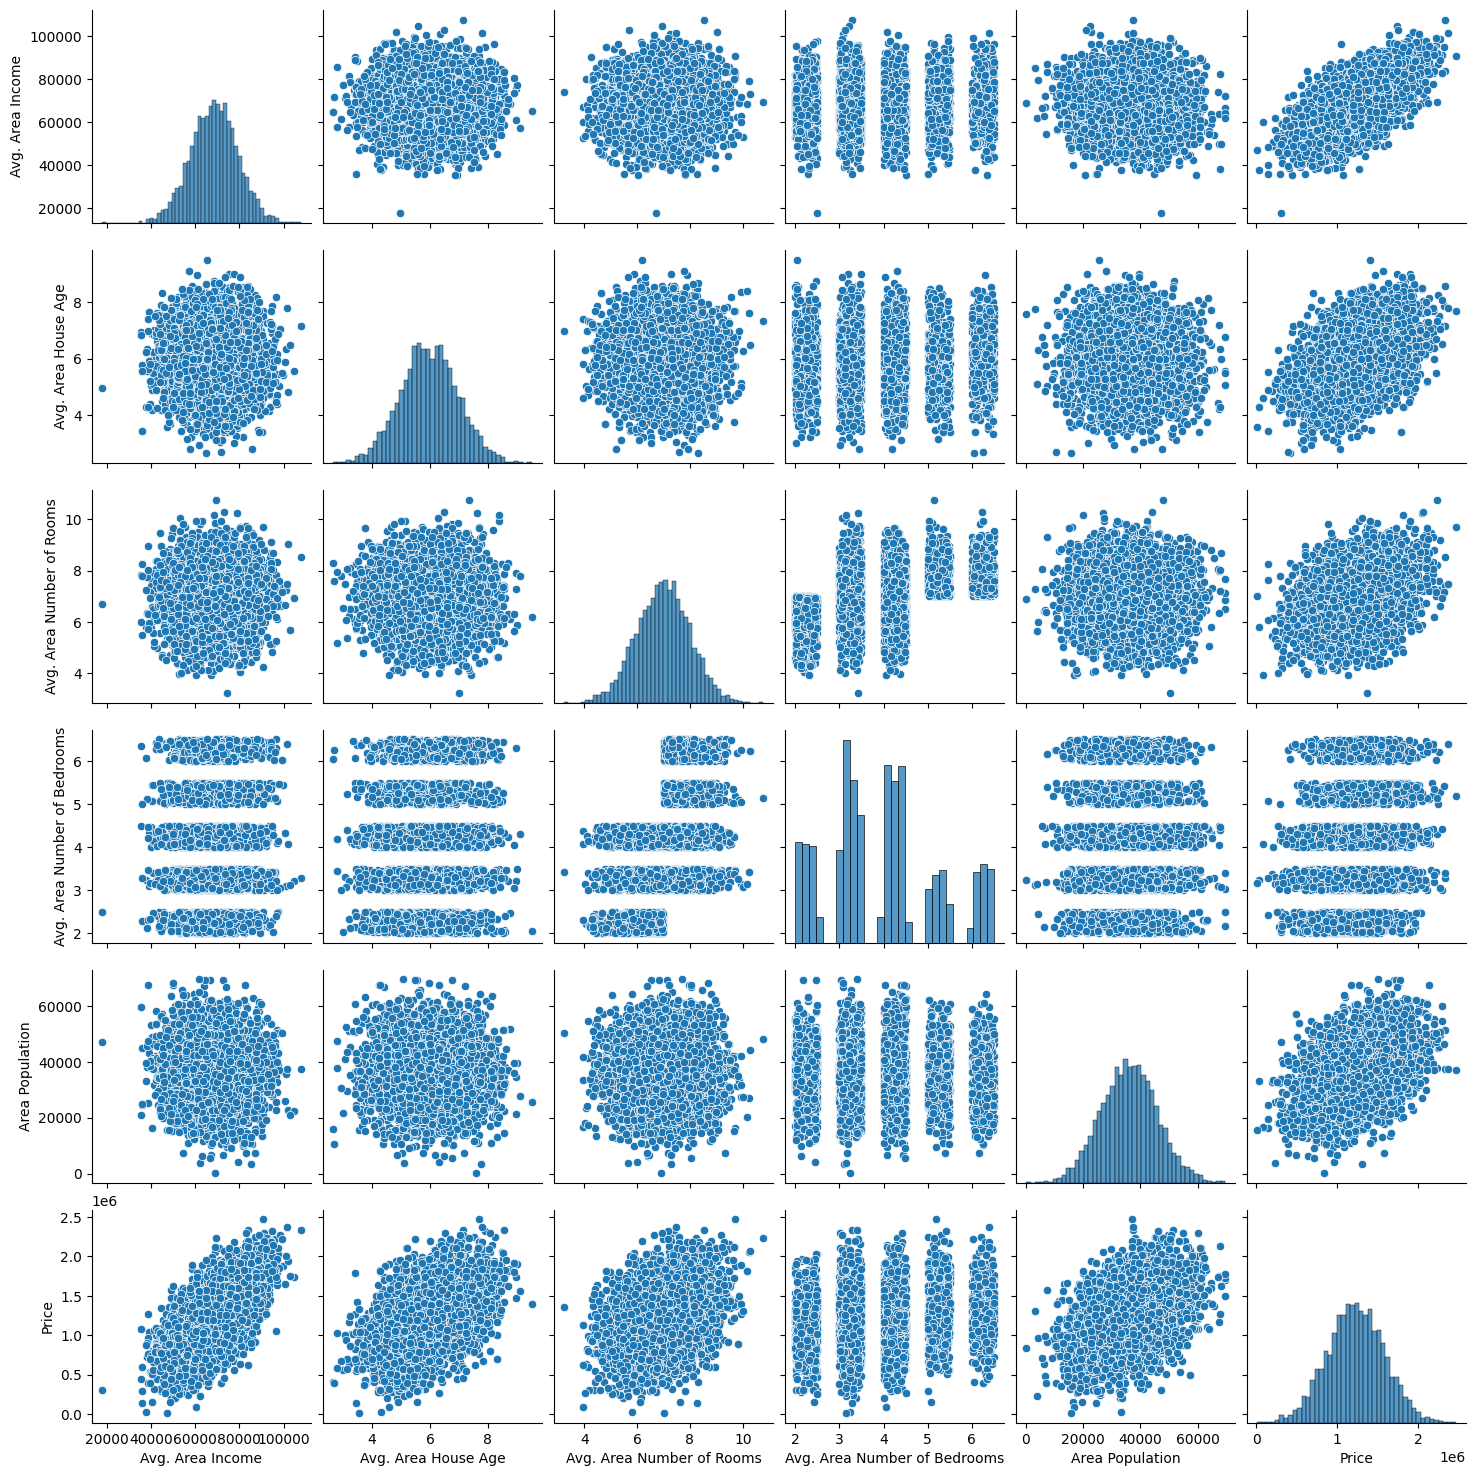

In [ ]:
sns.pairplot(df)


In [ ]:
sns.distplot(df['Price'])

<ipython-input-10-a2156be2e2df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds')


<Axes: >

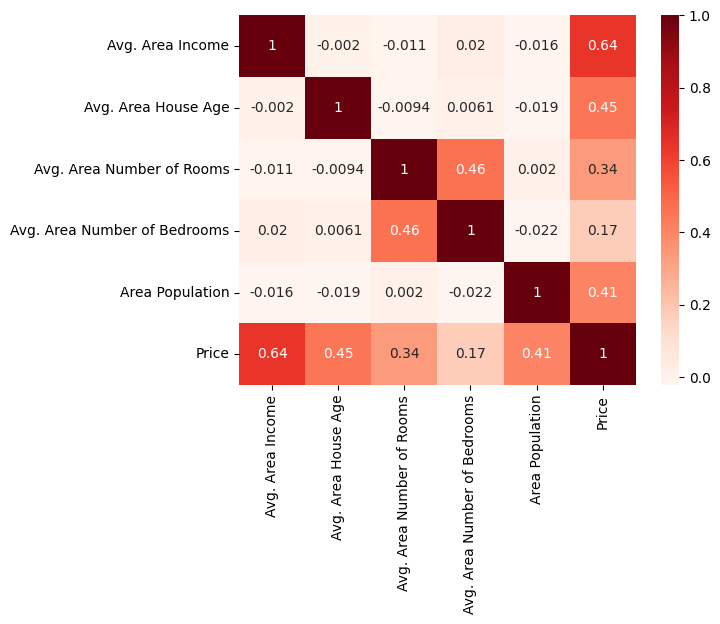

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

5- Determine the Features & Target Variable

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [ ]:
y=df['Price']

In [ ]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


6- Split the Dataset to Train & Test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

7- Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

With the coefficient; if one unit increases, the value will increase by the coefficient value


In [ ]:
pd.DataFrame(model.coef_, x.columns, columns=['coef'])

,coef
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


8- Predicting Test Data

In [ ]:
predictions=model.predict(x_test)

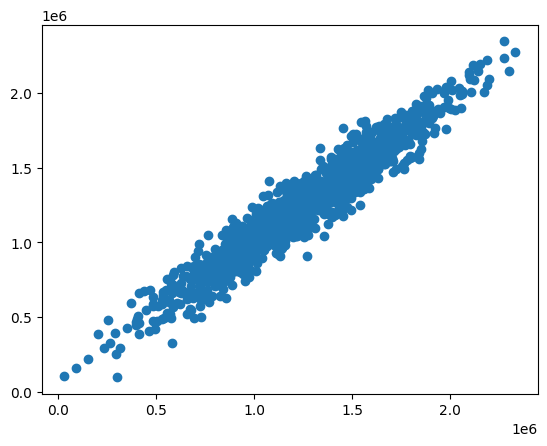

In [ ]:
plt.scatter(y_test, predictions)

** 9- Evaluating the Model **


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

In [ ]:
df['Price'].mean()

** 10-Residuals **

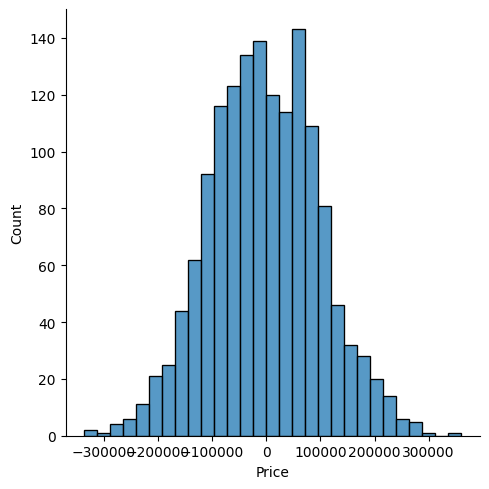

In [ ]:
sns.displot(y_test-predictions)

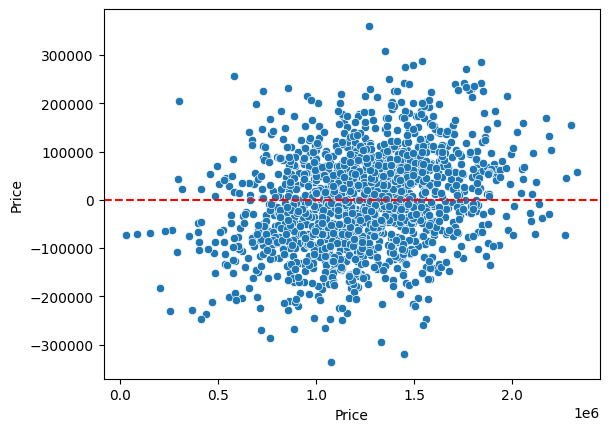

In [ ]:
sns.scatterplot(x=y_test, y=y_test-predictions)
plt.axhline(y=0, color='r', ls='--')

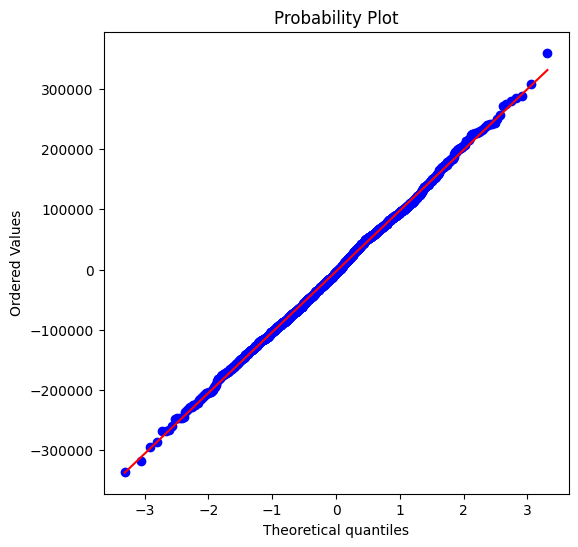

In [ ]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,6))
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(y_test-predictions,plot=ax)